# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 The drug is less effective when the mouse weighs more

 - The effectiveness of Capomulin seems to be comparable to Ramicane, it is significantly more effective than Infubinol and Ceftamine based on the box plots

 - Of the 4 drug regimens we analyzed, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were the other two drugs Infubinol and Ceftamin

 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how ='outer')


# Display the data table for preview
pymaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice.
unique_mouse_count = pymaceuticals_df['Mouse ID'].nunique()
print("Number of  Mice is:", unique_mouse_count)

Number of  Mice is: 249


In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_array = pymaceuticals_df['Mouse ID'].values

array_dtype = duplicate_mice_array.dtype

print("Duplicate Mouse IDs:")
print(duplicate_mice_array)
print("\nDType:", array_dtype)

Duplicate Mouse IDs:
['k403' 'k403' 'k403' ... 'z969' 'z969' 'z969']

DType: object


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = pymaceuticals_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

duplicate_mice_data = pymaceuticals_df[duplicate_mice]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pymaceuticals_df.loc[pymaceuticals_df['Mouse ID']!='g989']

In [39]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()
unique_mouse_count = pymaceuticals_df['Mouse ID'].unique()
print("Number of  Mice is:", clean_df['Mouse ID'].nunique())

Number of  Mice is: 248


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymaceuticals_Sort_df = pymaceuticals_df.sort_values(['Tumor Volume (mm3)'],ascending=True)
grouped_df = pymaceuticals_Sort_df.groupby('Drug Regimen')

tumor_mean= grouped_df['Tumor Volume (mm3)'].mean()
tumor_median=grouped_df['Tumor Volume (mm3)'].median()
tumor_var=grouped_df['Tumor Volume (mm3)'].var()
tumor_std=grouped_df['Tumor Volume (mm3)'].std()
tumor_sem=grouped_df['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_summary=pd.DataFrame({'Mean Tumor Volume':tumor_mean,
                            'Median Tumor Voulume':tumor_median,
                            'Tumor Volume Variance':tumor_var,
                            'Tumor Volume Std. Dev':tumor_std,
                            'Tumor Volume Std. Err.':tumor_sem})


In [41]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_df = pymaceuticals_df.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

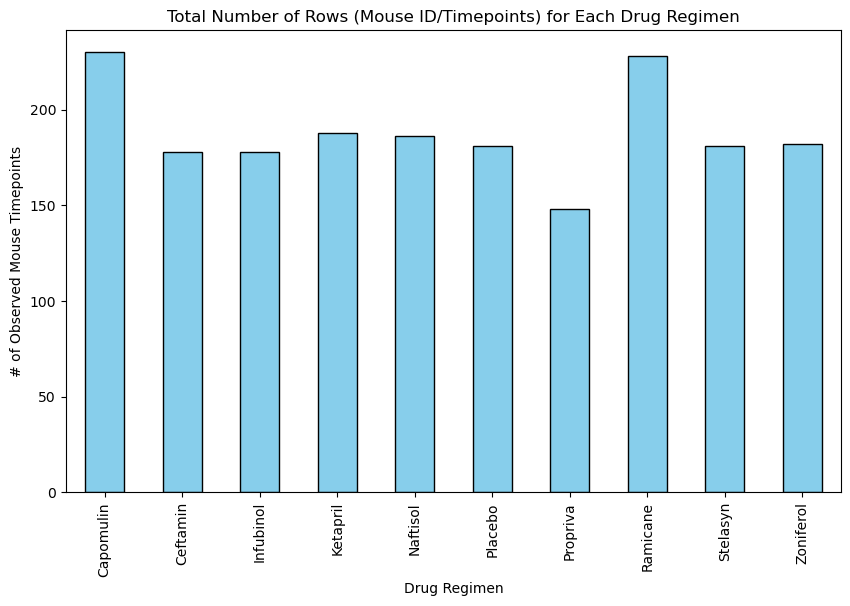

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df.groupby(["Drug Regimen"]).count()['Mouse ID']

drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()



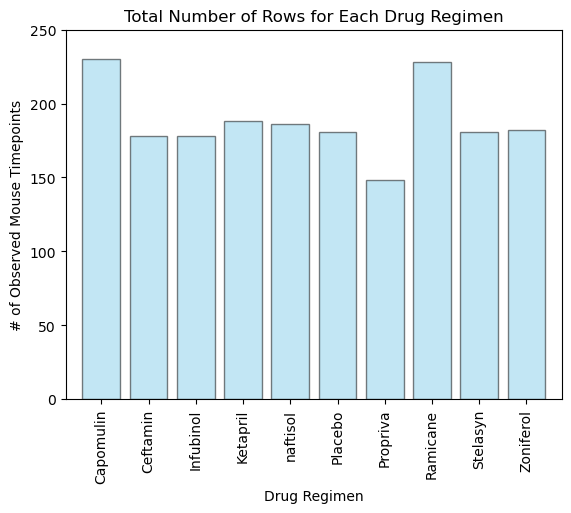

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data for the total number of rows for each drug regimen
drug_totals=[230,178,178, 188,186,181,148,228,181,182]
drug_drugs = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']  # Add your actual drug regimen names
x_axis= np.arange(len(drug_totals))

# Create the bar plot
plt.bar(x_axis, drug_totals, color='skyblue', alpha=0.5, align='center', edgecolor='black')
#set tick Values
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_drugs)
plt.xticks(rotation=90)

#set xlim adn ylim
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,250)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

In [44]:
gender_counts_df = clean_df['Sex'].value_counts()
mice_id_df = clean_df.groupby(['Mouse ID']).first()
sex_ratio_df = pd.merge(gender_counts_df, mice_id_df, on='Sex', how='outer')
mice_gender_df = pd.DataFrame(sex_ratio_df['Sex'].value_counts())
mice_gender_df.columns = ['Total Count']

# Calculate the sex ratio
mice_gender_df['Sex Ratio'] = (100 * (mice_gender_df['Total Count'] / mice_gender_df['Total Count'].sum()))
mice_gender_df['Sex Ratio'] = mice_gender_df['Sex Ratio'].map("{0:.3f}%".format)
mice_gender_df


,Total Count,Sex Ratio
Sex,,
Male,125,50.403%
Female,123,49.597%


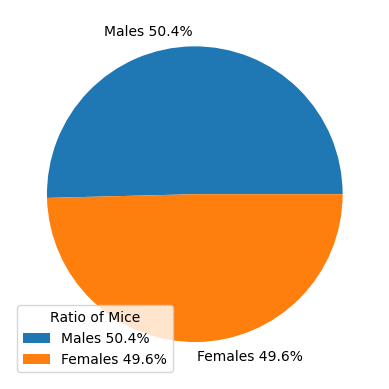

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = np.array(['50.4', '49.6'])
mylabels = ["Males 50.4%", "Females 49.6%"]

plt.pie(y, labels = mylabels)
plt.legend(title = "Ratio of Mice")
plt.show() 

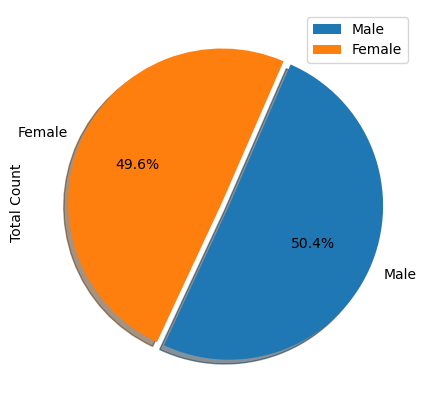

In [18]:
# Create a pie chart using pandas
colors=['tab:blue', 'tab:orange']
explode=(0.05,0)
plot = mice_gender_df.plot.pie(y='Total Count', figsize=(5,5), colors = colors, explode=explode, startangle=245, shadow = True, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Group the original cleaned DataFrame by 'Mouse ID' and find the maximum time point
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Start by getting the last (greatest) timepoint for each mouse
merged_df = pd.merge(clean_df, max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_last_timepoint = merged_df[['Mouse ID', 'Timepoint','Drug Regimen', 'Tumor Volume (mm3)']]
tumor_volume_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,45,Ramicane,22.050126
1,s185,45,Capomulin,23.343598
2,x401,45,Capomulin,28.484033
3,m601,45,Capomulin,28.430964
4,g791,45,Ramicane,29.128472
...,...,...,...,...
243,z314,5,Stelasyn,45.934712
244,z435,10,Propriva,48.710661
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
Mice_Drugs=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_tumor_vol_data=[Mice_Drugs]


# Calculate the IQR and identify potential outliers for each drug regimen
for drug in Mice_Drugs:
    # Filter the data for the current drug regimen
    drug_data = tumor_volume_last_timepoint.loc[tumor_volume_last_timepoint['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Calculate quartiles
    quartiles = drug_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Print results
    print(f"Drug Regimen: {drug}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")


Drug Regimen: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



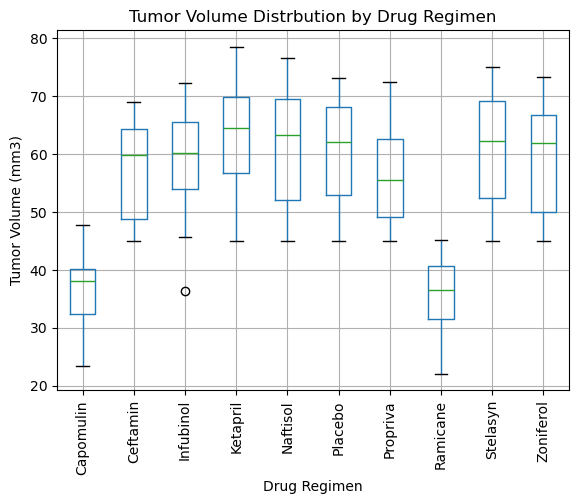

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_last_timepoint.boxplot(column='Tumor Volume (mm3)',by ='Drug Regimen')
plt.title('Tumor Volume Distrbution by Drug Regimen')
plt.suptitle('')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation= 90)
plt.show()


## Line and Scatter Plots

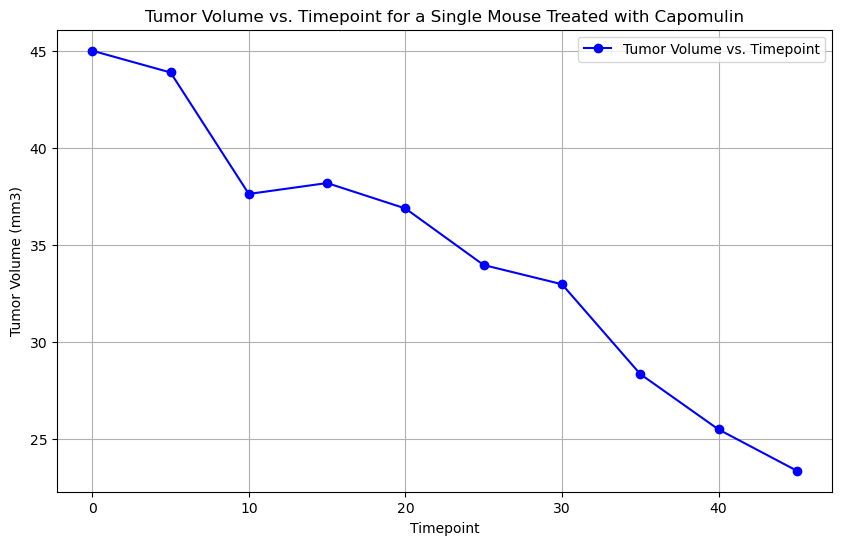

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Assuming you have a DataFrame named 'data' co ntaining the relevant data

# Filter the data for a single mouse treated with Capomulin
single_mouse_data = pymaceuticals_df.loc[(pymaceuticals_df['Mouse ID'] == 's185') & (pymaceuticals_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume vs. Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for a Single Mouse Treated with Capomulin')
plt.legend()
plt.grid(True)
plt.show()



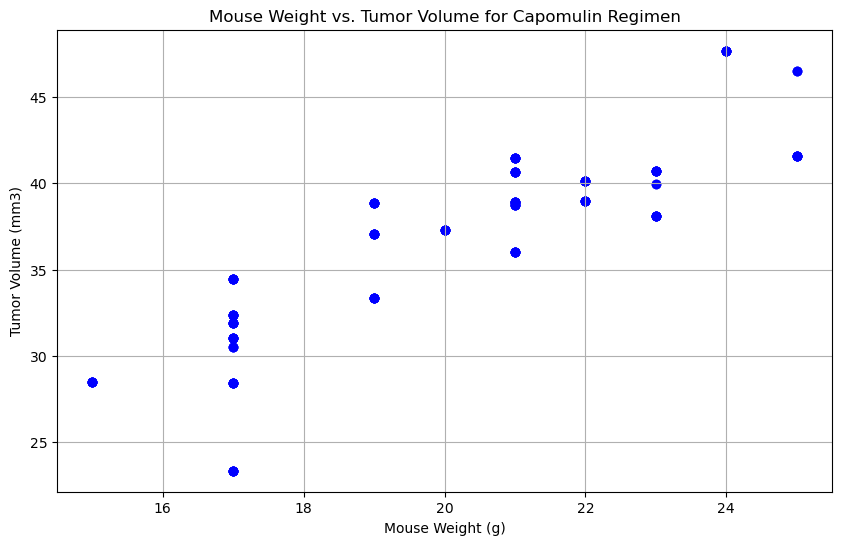

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = tumor_volume_last_timepoint[tumor_volume_last_timepoint['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the 'Weight (g)' column from capomulin_data into combined_ave_df based on 'Mouse ID'
combined_ave_df = pd.merge(average_tumor_volume, pymaceuticals_df[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

# Merge capomulin_data with combined_ave_df
final_merge_df = pd.merge(combined_ave_df, capomulin_data[capomulin_data['Drug Regimen'] == 'Capomulin'], on='Mouse ID', how='right')
final_merge_df


# Create a scatter plot of mouse weight vs. tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(final_merge_df['Weight (g)'], final_merge_df['Tumor Volume (mm3)_x'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume for Capomulin Regimen')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8629774187448636


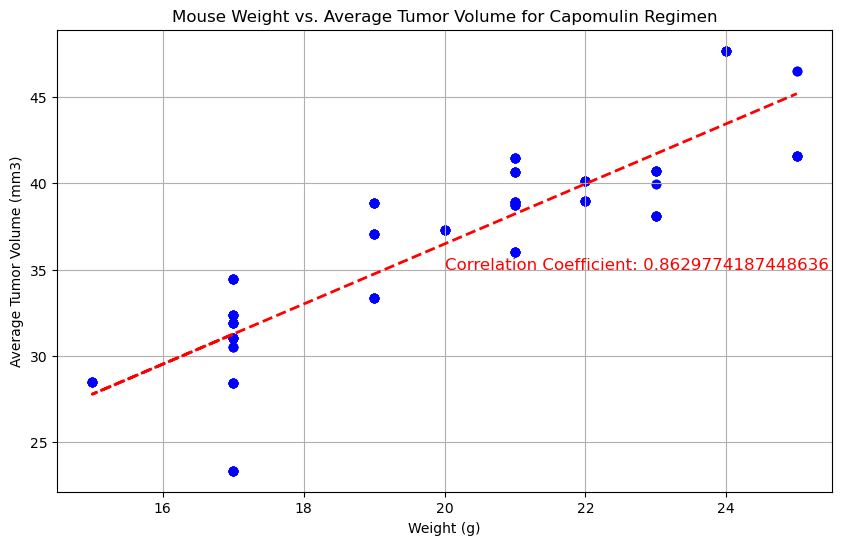

In [33]:


# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, p_value = st.pearsonr(final_merge_df['Weight (g)'], final_merge_df['Tumor Volume (mm3)_x'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(final_merge_df['Weight (g)'], final_merge_df['Tumor Volume (mm3)_x'])

# Calculate the regression values
regress_values = final_merge_df['Weight (g)'] * slope + intercept

# Create a scatter plot of mouse weight vs. average tumor volume for Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(final_merge_df['Weight (g)'], final_merge_df['Tumor Volume (mm3)_x'], color='blue', alpha=0.7)
plt.plot(final_merge_df['Weight (g)'], regress_values, color='red', linestyle='dashed', linewidth=2)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(20, 35, f'Correlation Coefficient: {correlation_coefficient}', fontsize=12, color='red')

plt.show()